In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import string
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import time
from sklearn.preprocessing import OneHotEncoder

## pydrive

In [0]:
#for connecting to google drive
!pip install -U -q PyDrive              

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
data = 'https://drive.google.com/open?id=13bGLEThO-5lfRCEl2Nvbsva9r75OV63b'   #Shareable link for train.tsv in Google Drive 

In [0]:
fluff, data_id = data.split('=')
print (data_id) 

13bGLEThO-5lfRCEl2Nvbsva9r75OV63b


In [0]:
downloaded_data = drive.CreateFile({'id':data_id}) 
downloaded_data.GetContentFile('labelencoded_withoutstats.pkl') 

## Model Params

In [0]:
# Loading pickle file for data.
data1 = pd.read_pickle('labelencoded_withoutstats.pkl')

In [0]:
data1.shape

(1478823, 207)

In [0]:
data1.columns

Index(['item_condition_id', 'brand_name', 'shipping', 'log_transform_price',
       'main_category', 'subcategory_1', 'subcategory_2', 'desc_0', 'desc_1',
       'desc_2',
       ...
       'name_70', 'name_71', 'name_72', 'name_73', 'name_74', 'name_75',
       'name_76', 'name_77', 'name_78', 'name_79'],
      dtype='object', length=207)

In [0]:
data1.fillna(0, inplace=True)

In [0]:
data1.isnull().sum()

item_condition_id      0
brand_name             0
shipping               0
log_transform_price    0
main_category          0
                      ..
name_75                0
name_76                0
name_77                0
name_78                0
name_79                0
Length: 207, dtype: int64

In [0]:
y = data1['log_transform_price']

In [0]:
data1.drop(columns={'log_transform_price'},inplace = True)

In [0]:
  # Feature Scaling
  from sklearn.preprocessing import StandardScaler

## My DRive, save pickle

In [0]:
  sc = StandardScaler()
  data1 = sc.fit_transform(data1)


In [0]:
#serializing our model to a file called sc.pkl
# import pickle
# pickle.dump(sc, open(inDir+"/sc.pkl","wb"))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size = 0.2)

In [0]:
X_train = sc.transform(X_train)

In [0]:
X_test = sc.transform(X_test)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(1183058, 206) (1183058,)
(295765, 206) (295765,)


In [0]:
from __future__ import print_function
import keras
from tensorflow.keras.models import Sequential , load_model , model_from_json
# from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.constraints import maxnorm
import tensorflow as tf



# Convolutional Neural Network
# from keras.layers.convolutional import Conv1D
# from keras.layers.pooling import MaxPooling1D


In [0]:
# import tensorflow as tf
# tf.__version__

In [0]:
# !pip uninstall tensorflow

In [0]:
# !pip install tensorflow==2.0.0


In [0]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D,MaxPooling1D, Input, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
# from keras.models import model_from_json
from tensorflow.keras import backend as K

from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

In [0]:
  # from sklearn.datasets import make_regression
  # from sklearn.preprocessing import MinMaxScaler

In [0]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_t = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [0]:
X.shape

(1183058, 206, 1)

In [0]:
# 3D view of sample data for CNN
X[:5]

array([[[-1.99843717],
        [-2.25214736],
        [ 1.33611515],
        ...,
        [-0.33576472],
        [-7.86285215],
        [-0.07648946]],

       [[-1.99843717],
        [-2.25214736],
        [ 1.33611515],
        ...,
        [ 0.83481269],
        [-5.99048226],
        [ 2.19767815]],

       [[-3.22442881],
        [-2.25138757],
        [ 1.33611515],
        ...,
        [ 5.62034245],
        [-0.10525979],
        [ 3.14697469]],

       [[-0.77244552],
        [-2.25138757],
        [-2.70884347],
        ...,
        [ 1.38050582],
        [-4.45021986],
        [-0.70012632]],

       [[-0.77244552],
        [-2.25151912],
        [-2.70884347],
        ...,
        [-0.5358798 ],
        [-1.52756714],
        [-2.89130434]]])

## Model 1 - CNN(4 layer network)

In [0]:
  # define model
  model2 = Sequential()
  model2.add(Conv1D(filters = 64,kernel_size = 2,activation='relu',input_shape=(206,1)))
  model2.add(MaxPooling1D(pool_size=2))
  model2.add(Flatten())
  model2.add(Dense(50, activation='relu'))
  model2.add(Dense(1))

In [0]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [0]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 205, 64)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 102, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6528)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                326450    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 326,693
Trainable params: 326,693
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size = 128
epochs = 10
history = model2.fit(X, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(X_t, y_test))




Train on 1183058 samples, validate on 295765 samples
Epoch 1/10





1183058/1183058 [==============================] - 44s 38us/step - loss: 0.5550 - val_loss: 0.5254
Epoch 2/10
1183058/1183058 [==============================] - 36s 31us/step - loss: 0.5270 - val_loss: 0.5241
Epoch 3/10
1183058/1183058 [==============================] - 36s 30us/step - loss: 0.5249 - val_loss: 0.5224
Epoch 4/10
1183058/1183058 [==============================] - 36s 30us/step - loss: 0.5241 - val_loss: 0.5238
Epoch 5/10
1183058/1183058 [==============================] - 36s 31us/step - loss: 0.5237 - val_loss: 0.5232
Epoch 6/10
1183058/1183058 [==============================] - 36s 30us/step - loss: 0.5235 - val_loss: 0.5232
Epoch 7/10
1183058/1183058 [==============================] - 36s 30us/step - loss: 0.5233 - val_loss: 0.5241
Epoch 8/10
1183058/1183058 [==============================] - 37s 31us/step - loss: 0.5229 - val_loss: 0.5282
Epoch 9/10
1183058/1183058 [==============================]

In [0]:
# import matplotlib.pyplot as plt
# # plot metrics
# plt.plot(history.history['mean_squared_error'])
# # pyplot.plot(history.history['mean_squared_logarithmic_error'])
# plt.show()

In [0]:
y_pred = model2.predict(X_t)

In [0]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)

0.18013035219422666


### Model Evaluation

In [0]:
from sklearn.metrics import mean_squared_log_error
score2 = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(score2)

0.1794135394993634


In [0]:
#serializing our model to a file called model.pkl
import pickle
pickle.dump(model2, open(inDir+"/model.pkl","wb"))

# model2.to_pickle(inDir+"/model.pkl")

## Model 2 - MLP(4 layer)

In [0]:

print(type(X_train),type(X_test),type(y_train),type(y_test))

y_train= np.asarray(y_train) 
y_test= np.asarray(y_test)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [0]:
model = Sequential()
input_size =X_train.shape[1]
model.add(Dense(1024, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

sgd = SGD(lr=0.001, nesterov=True);
model.compile(loss='mse', optimizer=sgd)


In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              211968    
_________________________________________________________________
activation_9 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)              

In [0]:
model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test,y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=4)] )

In [0]:
predictions = model.predict(X_test)
# score =model.evaluate(X_test, y_test, batch_size=20,  verbose=0)

# # print('Mean Squared Error: %.2f'% (score[0]))

In [0]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, predictions))
print(rmsle)

0.18171821341353686


## Model3 - 2 Layer MLP

In [0]:
# define model
# from HW9 Machine learning
model4 = Sequential()

model4.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model4.add(Dense(1, activation='relu'))
opt = SGD(lr=0.01, momentum=0.9)
model4.compile(loss='mse', optimizer=opt)


In [0]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                5175      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 5,201
Trainable params: 5,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)


Train on 1183058 samples, validate on 295765 samples
Epoch 1/10
1183058/1183058 [==============================] - 93s 78us/step - loss: 0.8566 - acc: 2.4513e-05 - val_loss: 0.5727 - val_acc: 0.0000e+00
Epoch 2/10
1183058/1183058 [==============================] - 93s 79us/step - loss: 0.5665 - acc: 0.0000e+00 - val_loss: 0.5630 - val_acc: 0.0000e+00
Epoch 3/10
1183058/1183058 [==============================] - 93s 78us/step - loss: 0.5640 - acc: 0.0000e+00 - val_loss: 0.5634 - val_acc: 0.0000e+00
Epoch 4/10
1183058/1183058 [==============================] - 92s 78us/step - loss: 0.5635 - acc: 0.0000e+00 - val_loss: 0.5622 - val_acc: 0.0000e+00
Epoch 5/10
1183058/1183058 [==============================] - 92s 78us/step - loss: 0.5649 - acc: 0.0000e+00 - val_loss: 0.5669 - val_acc: 0.0000e+00
Epoch 6/10
1183058/1183058 [==============================] - 91s 77us/step - loss: 0.5633 - acc: 0.0000e+00 - val_loss: 0.5615 - val_acc: 0.0000e+00
Epoch 7/10
1183058/1183058 [===================

In [0]:
# evaluate the model
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# # learning curves of model accuracy
# plt.plot(history4.history['accuracy'], label='train')
# plt.plot(history4.history['val_accuracy'], label='test')
# plt.legend()
# plt.show()

In [0]:
y_pred4 = model4.predict(X_test)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred4))
print(rmsle)

0.18859559669791073


## Model 4 - with CNN multilayer

In [0]:
# define model
# from HW9 Machine learning
# define model
model7 = Sequential()
model7.add(Conv1D(filters = 128,kernel_size = 2,activation='relu',input_shape=(206,1)))
# model7.add(LSTM(10,activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
# model7.add(LSTM(10,activation='relu'))
model7.add(MaxPooling1D(pool_size=2))
model7.add(Flatten())

model7.add(Dense(50, activation='relu'))
model7.add(Dense(1))

In [0]:
model7.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [0]:
model7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 205, 128)          384       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 102, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 101, 64)           16448     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                160050    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
batch_size = 128
epochs = 10
history = model7.fit(X, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(X_t, y_test))




Train on 1183058 samples, validate on 295765 samples
Epoch 1/10





1183058/1183058 [==============================] - 119s 100us/step - loss: 0.5338 - mean_squared_error: 0.5338 - mean_absolute_error: 0.5677 - val_loss: 0.5193 - val_mean_squared_error: 0.5193 - val_mean_absolute_error: 0.5579
Epoch 2/10
1183058/1183058 [==============================] - 111s 94us/step - loss: 0.5204 - mean_squared_error: 0.5204 - mean_absolute_error: 0.5606 - val_loss: 0.5207 - val_mean_squared_error: 0.5207 - val_mean_absolute_error: 0.5643
Epoch 3/10
1183058/1183058 [==============================] - 112s 95us/step - loss: 0.5179 - mean_squared_error: 0.5179 - mean_absolute_error: 0.5592 - val_loss: 0.5169 - val_mean_squared_error: 0.5169 - val_mean_absolute_error: 0.5569
Epoch 4/10
1183058/1183058 [==============================] - 114s 96us/step - loss: 0.5161 - mean_squared_error: 0.5161 - mean_absolute_error: 0.5582 - val_loss: 0.5159 - val_mean_squared_error: 0.5159 - val_mean_absolute_erro

In [0]:
y_pred7 = model7.predict(X_t)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred7))
print(rmsle)

0.17723910899660375


## Model-8

In [0]:
# define model
model8 = Sequential()
model8.add(Conv1D(filters = 512,kernel_size = 2,activation='relu',input_shape=(206,1)))
model8.add(Dropout(0.1))
# model7.add(LSTM(10,activation='relu'))
# model8.add(MaxPooling1D(pool_size=2))
model8.add(Conv1D(filters = 256,kernel_size = 2,activation='relu'))
model8.add(Dropout(0.1))
# model8.add(MaxPooling1D(pool_size=2))
model8.add(Conv1D(filters = 128,kernel_size = 2,activation='relu'))
model8.add(Dropout(0.1))
# model7.add(LSTM(10,activation='relu'))
model8.add(MaxPooling1D(pool_size=2))
model8.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
model8.add(Dropout(0.1))
# model7.add(LSTM(10,activation='relu'))
model8.add(MaxPooling1D(pool_size=2))
# model8.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
# # model7.add(LSTM(10,activation='relu'))
# model8.add(MaxPooling1D(pool_size=2))
model8.add(Flatten())

model8.add(Dense(50, activation='relu'))
model8.add(Dense(1))
# model8.add(LSTM(1, activation='relu'))

In [0]:
model8.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [0]:
model8.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 205, 512)          1536      
_________________________________________________________________
dropout_6 (Dropout)          (None, 205, 512)          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 204, 256)          262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 204, 256)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 203, 128)          65664     
_________________________________________________________________
dropout_8 (Dropout)          (None, 203, 128)          0         
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 101, 128)         

In [0]:
batch_size = 128
epochs = 10
history8 = model8.fit(X, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(X_t, y_test))

In [0]:
y_pred8 = model8.predict(X_t)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred8))
print(rmsle)

0.17962092775729005


## Model 5 - LSTM

In [0]:
X.shape

(1183058, 206, 1)

In [0]:
x_train_lstm = X_train.reshape(-1, 1, 206)
x_test_lstm  = X_test.reshape(-1, 1, 206)
y_train_lstm = y_train.reshape(-1, 1, 1)
y_test_lstm = y_test.reshape(-1, 1, 1)

In [0]:
x_train_lstm.shape

(1183058, 1, 206)

In [0]:
model9 = Sequential()
model9.add(LSTM(10, input_shape=(1, 206), return_sequences=True))
model9.add(LSTM(1, input_shape=(1, 206), return_sequences=True))
model9.compile(loss="mean_absolute_error", optimizer="adam")

In [0]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 10)             8680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 1)              48        
Total params: 8,728
Trainable params: 8,728
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model9.fit(x_train_lstm,y_train_lstm,epochs=5, validation_data=(x_test_lstm,y_test_lstm))

In [0]:
y_pred9 = y_pred9.reshape(-1,1)
y_test_lstm = y_test_lstm.reshape(-1,1)

In [0]:
y_test_lstm.shape

(295765, 1)

In [0]:
y_pred9.shape

(295765, 1)

In [0]:
# y_pred9 = model9.predict(x_test_lstm)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test_lstm, y_pred9))
print(rmsle)

0.8191935748877457


## Model 6 - with dropouts - Final Model

In [0]:
def rmsle(y_true, y_pred):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))

In [0]:
# define model
model10 = Sequential()
model10.add(Conv1D(filters = 128,kernel_size = 2,activation='relu',input_shape=(206,1)))
model10.add(Dropout(0.1))
model10.add(MaxPooling1D(pool_size=2))
model10.add(Conv1D(filters = 64,kernel_size = 2,activation='relu'))
model10.add(Dropout(0.1))
model10.add(MaxPooling1D(pool_size=2))
model10.add(Flatten())

model10.add(Dense(50, activation='relu'))
model10.add(Dense(10, activation='relu'))
model10.add(Dense(1))

In [0]:
model10.compile(optimizer='adam', loss='mse', metrics=[rmsle])

In [0]:
model10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 205, 128)          384       
_________________________________________________________________
dropout_14 (Dropout)         (None, 205, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 102, 128)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 101, 64)           16448     
_________________________________________________________________
dropout_15 (Dropout)         (None, 101, 64)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)            

In [0]:
y_train= np.asarray(y_train) 
y_test= np.asarray(y_test)

In [0]:
batch_size = 128
epochs = 10
history10 = model10.fit(X, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(X_t, y_test))

Train on 1183058 samples, validate on 295765 samples
Epoch 1/10
1183058/1183058 [==============================] - 1099s 929us/sample - loss: 0.5398 - rmsle: 0.1823 - val_loss: 0.6087 - val_rmsle: 0.1886
Epoch 2/10
1183058/1183058 [==============================] - 1058s 894us/sample - loss: 0.5228 - rmsle: 0.1796 - val_loss: 0.5257 - val_rmsle: 0.1784
Epoch 3/10
1183058/1183058 [==============================] - 1049s 887us/sample - loss: 0.5204 - rmsle: 0.1792 - val_loss: 0.5611 - val_rmsle: 0.1820
Epoch 4/10
1183058/1183058 [==============================] - 1051s 888us/sample - loss: 0.5195 - rmsle: 0.1790 - val_loss: 0.5403 - val_rmsle: 0.1796
Epoch 5/10
1183058/1183058 [==============================] - 1050s 887us/sample - loss: 0.5186 - rmsle: 0.1789 - val_loss: 0.5212 - val_rmsle: 0.1783
Epoch 6/10
1183058/1183058 [==============================] - 1068s 903us/sample - loss: 0.5181 - rmsle: 0.1788 - val_loss: 0.5200 - val_rmsle: 0.1784
Epoch 7/10
1183058/1183058 [=============

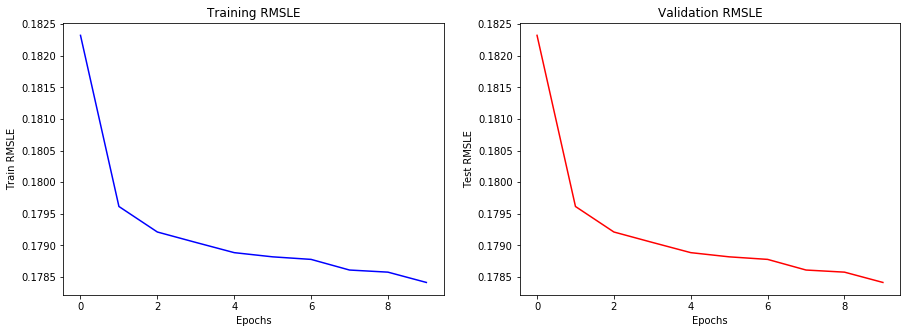

In [0]:
rmsle_train = history10.history['rmsle']
val_mse = history10.history['rmsle']
loss = history10.history['loss']
val_loss = history10.history['val_loss']
epochs = range(10)

fig = plt.figure(figsize= (15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text("Training RMSLE")
ax2.title.set_text("Validation RMSLE")

ax1.plot(epochs, rmsle_train, 'b', label='Training RMSLE', )
ax1.set(xlabel = "Epochs", ylabel= "Train RMSLE")

ax2.plot(epochs, val_mse, 'r', label='Test RMSLE')
ax2.set(xlabel = "Epochs", ylabel= "Test RMSLE")
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'b', label='Training loss',)
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
plt.show()

In [0]:
y_pred10 = model10.predict(X_t)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred10))
print(rmsle)

0.17882677593330223
